# 감성분석
- 1. 사전
- **2. 머신러닝**

## 머신러닝 의한 감성 분석

- 1. 형태소 분석을 통해 품사 분류를 진행
- 2. vector 토큰화 (단어를 숫자화(OHE이용?))
- 3. 목표 변수 생성
- 4. 머신러닝 학습
- 5. 머신러닝 학습을 통한 예측


In [2]:
comments_positive = [
    "맛이 정말 풍부하고, 재료도 신선해서 좋았어요. 서비스도 훌륭했습니다.",  # 음식
    "해변이 너무 깨끗하고 아름다웠습니다. 다음 여행에서는 더 오래 머물고 싶네요.",  # 여행지
    "연기력이 대단했고, 스토리 전개가 매우 재미있었습니다. 강력 추천합니다!",  # 영화
    "노래의 가사와 멜로디가 너무 좋아요, 계속 듣게 되네요.",  # 음악
    "핸들링이 매우 부드럽고 연비도 좋습니다. 차량 내부 디자인도 세련되었어요.",  # 자동차
    "배터리 수명이 길고 카메라 기능이 우수합니다. 사용하기 편리한 UI가 마음에 듭니다.",  # 스마트폰
    "교수님 설명이 명확하시고 이해하기 쉽습니다, 추가 자료도 유용했습니다.",  # 강의
    "성능 대비 가격이 아주 만족스러워요, 게임을 할 때 지연 없이 부드럽게 실행됩니다.",  # 컴퓨터 
    "분위기가 정말 좋아서 친구들과 수다 떨기 좋아요, 커피 맛도 최상입니다!",   #카페 
     "글쓰기 스타일과 주제 모두 제 취향에 딱 맞아서 한 번 읽기 시작하면 멈출 수 없어요."   #서적 
]

comments_negative = [
    "음식이 너무 짜고, 서비스도 별로였어요. 다시 가고 싶지 않네요.",  # 음식
    "해변이 너무 더러웠고, 주변 시설도 부족했습니다. 다시는 방문하고 싶지 않아요.",  # 여행지
    "연기력이 별로였고, 스토리 전개도 지루했습니다. 비추합니다!",  # 영화
    "노래 가사가 이해가 안 가고, 멜로디도 재미없어요. 듣기 싫네요.",  # 음악
    "핸들링이 너무 뻑뻑하고 연비도 나쁩니다. 차량 내부 디자인도 구식이에요.",  # 자동차
    "배터리 수명이 짧고 카메라 기능도 별로입니다. 사용하기 어렵습니다.",  # 스마트폰
    "교수님 설명이 애매하시고 이해하기 어렵습니다, 추가 자료도 도움되지 않았어요.",  # 강의
    "성능 대비 가격이 너무 비싸요, 게임을 할 때 계속 지연됩니다.",  # 컴퓨터 
    "분위기가 시끄럽서 친구들과 수다 떨기 힘들었어요, 커피 맛도 그다지...",   #카페 
     "글쓰기 스타일과 주제 모두 제 취향과 맞지 않아서 한 페이지 읽는 것조차 힘들었어요."   #서적 
]

In [3]:
len(comments_positive), len(comments_negative)

(10, 10)

In [4]:
comments_list = comments_positive + comments_negative

In [5]:
comments_list

['맛이 정말 풍부하고, 재료도 신선해서 좋았어요. 서비스도 훌륭했습니다.',
 '해변이 너무 깨끗하고 아름다웠습니다. 다음 여행에서는 더 오래 머물고 싶네요.',
 '연기력이 대단했고, 스토리 전개가 매우 재미있었습니다. 강력 추천합니다!',
 '노래의 가사와 멜로디가 너무 좋아요, 계속 듣게 되네요.',
 '핸들링이 매우 부드럽고 연비도 좋습니다. 차량 내부 디자인도 세련되었어요.',
 '배터리 수명이 길고 카메라 기능이 우수합니다. 사용하기 편리한 UI가 마음에 듭니다.',
 '교수님 설명이 명확하시고 이해하기 쉽습니다, 추가 자료도 유용했습니다.',
 '성능 대비 가격이 아주 만족스러워요, 게임을 할 때 지연 없이 부드럽게 실행됩니다.',
 '분위기가 정말 좋아서 친구들과 수다 떨기 좋아요, 커피 맛도 최상입니다!',
 '글쓰기 스타일과 주제 모두 제 취향에 딱 맞아서 한 번 읽기 시작하면 멈출 수 없어요.',
 '음식이 너무 짜고, 서비스도 별로였어요. 다시 가고 싶지 않네요.',
 '해변이 너무 더러웠고, 주변 시설도 부족했습니다. 다시는 방문하고 싶지 않아요.',
 '연기력이 별로였고, 스토리 전개도 지루했습니다. 비추합니다!',
 '노래 가사가 이해가 안 가고, 멜로디도 재미없어요. 듣기 싫네요.',
 '핸들링이 너무 뻑뻑하고 연비도 나쁩니다. 차량 내부 디자인도 구식이에요.',
 '배터리 수명이 짧고 카메라 기능도 별로입니다. 사용하기 어렵습니다.',
 '교수님 설명이 애매하시고 이해하기 어렵습니다, 추가 자료도 도움되지 않았어요.',
 '성능 대비 가격이 너무 비싸요, 게임을 할 때 계속 지연됩니다.',
 '분위기가 시끄럽서 친구들과 수다 떨기 힘들었어요, 커피 맛도 그다지...',
 '글쓰기 스타일과 주제 모두 제 취향과 맞지 않아서 한 페이지 읽는 것조차 힘들었어요.']

### 형태소분석기를 통해 품사 분류
- 이게 list로 나오는데 우린 list가 아니라 품사 상태가 필요하다. 고로 문장으로 만들거다. 
- 

In [6]:
from mecab import MeCab

In [7]:
mecab = MeCab()

In [8]:
tokenized_comment = list()

for comment in comments_list : 
    comment_morphs=mecab.morphs(comment)
    # print(comment_morphs) # ., ,, 한글자 불용어 빼기 len(word)>1 #list로 되어있으므로 이를 문장으로 만든다. 
    # mecab.nouns(comment_morphs) : 하지 않는 이유는 문장으로 진행해야하기 때문
    # 원래는 .pos로 품사를 확인한 뒤 조사, 기호는 제외해야함. 
    # 문장을 list로 되어있다면 이걸 looping 돌려서 제외시켜야함. tagging으로 형태소를 looping해야함. 
    # print(' '.join(comment_morphs))
    # .append(' '.join(comment_morphs))     
    tokenized_comment.append(comment_morphs)
    
tokenized_comment

[['맛',
  '이',
  '정말',
  '풍부',
  '하',
  '고',
  ',',
  '재료',
  '도',
  '신선',
  '해서',
  '좋',
  '았',
  '어요',
  '.',
  '서비스',
  '도',
  '훌륭',
  '했',
  '습니다',
  '.'],
 ['해변',
  '이',
  '너무',
  '깨끗',
  '하',
  '고',
  '아름다웠',
  '습니다',
  '.',
  '다음',
  '여행',
  '에서',
  '는',
  '더',
  '오래',
  '머물',
  '고',
  '싶',
  '네요',
  '.'],
 ['연기력',
  '이',
  '대단',
  '했',
  '고',
  ',',
  '스토리',
  '전개',
  '가',
  '매우',
  '재미있',
  '었',
  '습니다',
  '.',
  '강력',
  '추천',
  '합니다',
  '!'],
 ['노래',
  '의',
  '가사',
  '와',
  '멜로디',
  '가',
  '너무',
  '좋',
  '아요',
  ',',
  '계속',
  '듣',
  '게',
  '되',
  '네요',
  '.'],
 ['핸들링',
  '이',
  '매우',
  '부드럽',
  '고',
  '연비',
  '도',
  '좋',
  '습니다',
  '.',
  '차량',
  '내부',
  '디자인',
  '도',
  '세련',
  '되',
  '었',
  '어요',
  '.'],
 ['배터리',
  '수명',
  '이',
  '길',
  '고',
  '카메라',
  '기능',
  '이',
  '우수',
  '합니다',
  '.',
  '사용',
  '하',
  '기',
  '편리',
  '한',
  'UI',
  '가',
  '마음',
  '에',
  '듭니다',
  '.'],
 ['교수',
  '님',
  '설명',
  '이',
  '명확',
  '하',
  '시',
  '고',
  '이해',
  '하',
  '기',
  '쉽',
  '습니다',
  ',',
 

### 벡터 토큰화(단어 숫자화)
- sklearn.feature_extraction.text.CountVectorizer
    - class sklearn.feature_extraction.text.CountVectorizer(* = 값 = 문장으로 넣어야함.  ) 학습화
    - vocabulary_dict: A mapping of terms to feature indices.
    - fixed_vocabulary_bool: True if a fixed vocabulary of term to indices mapping is provided by the user.
        - True가 학습화가 되었다는 뜻임. 
    - stop_words_set: Terms that were ignored because they either 
        - occurred in too many documents (max_df)
        - occurred in too few documents (min_df)
        - were cut off by feature selection (max_features).
- sklearn.feature_extraction.text.TfidfVectorizer
    - class sklearn.feature_extraction.text.TfidfVectorizer(* = 값, use_idf=True ) 학습화



In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [10]:
#하나의 문장으로 넣어야함.
comments = list()
for token in tokenized_comment: 
     comments.append(' '.join(token))
comments           

['맛 이 정말 풍부 하 고 , 재료 도 신선 해서 좋 았 어요 . 서비스 도 훌륭 했 습니다 .',
 '해변 이 너무 깨끗 하 고 아름다웠 습니다 . 다음 여행 에서 는 더 오래 머물 고 싶 네요 .',
 '연기력 이 대단 했 고 , 스토리 전개 가 매우 재미있 었 습니다 . 강력 추천 합니다 !',
 '노래 의 가사 와 멜로디 가 너무 좋 아요 , 계속 듣 게 되 네요 .',
 '핸들링 이 매우 부드럽 고 연비 도 좋 습니다 . 차량 내부 디자인 도 세련 되 었 어요 .',
 '배터리 수명 이 길 고 카메라 기능 이 우수 합니다 . 사용 하 기 편리 한 UI 가 마음 에 듭니다 .',
 '교수 님 설명 이 명확 하 시 고 이해 하 기 쉽 습니다 , 추가 자료 도 유용 했 습니다 .',
 '성능 대비 가격 이 아주 만족 스러워 요 , 게임 을 할 때 지연 없이 부드럽 게 실행 됩니다 .',
 '분위기 가 정말 좋 아서 친구 들 과 수다 떨기 좋 아요 , 커피 맛 도 최상 입니다 !',
 '글쓰기 스타일 과 주제 모두 제 취향 에 딱 맞 아서 한 번 읽 기 시작 하 면 멈출 수 없 어요 .',
 '음식 이 너무 짜 고 , 서비스 도 별로 였 어요 . 다시 가 고 싶 지 않 네요 .',
 '해변 이 너무 더러웠 고 , 주변 시설 도 부족 했 습니다 . 다시 는 방문 하 고 싶 지 않 아요 .',
 '연기력 이 별로 였 고 , 스토리 전개 도 지루 했 습니다 . 비추 합니다 !',
 '노래 가사 가 이해 가 안 가 고 , 멜로디 도 재미없 어요 . 듣 기 싫 네요 .',
 '핸들링 이 너무 뻑뻑 하 고 연비 도 나쁩니다 . 차량 내부 디자인 도 구식 이 에요 .',
 '배터리 수명 이 짧 고 카메라 기능 도 별로 입니다 . 사용 하 기 어렵 습니다 .',
 '교수 님 설명 이 애매 하 시 고 이해 하 기 어렵 습니다 , 추가 자료 도 도움 되 지 않 았 어요 .',
 '성능 대비 가격 이 너무 비싸 요 , 게임 을 할 때 계속 지연 됩니다 .',
 '분위기 가 시

In [11]:
countVectorizer = CountVectorizer()

In [12]:
countVectorizer.fit(comments)

CountVectorizer()

In [13]:
countVectorizer.vocabulary_ #여기에 숫자들은 중복되지 않음 = 글자에 대한 numbering을 함(현재 이건 등급 ? 순서가 매겨진 상태임. scalling이 되어야함.-이의 단점을 보완한게 TfidfVectorizer)

{'정말': 84,
 '풍부': 100,
 '재료': 80,
 '신선': 58,
 '해서': 103,
 '어요': 66,
 '서비스': 45,
 '훌륭': 105,
 '습니다': 54,
 '해변': 102,
 '너무': 14,
 '깨끗': 11,
 '아름다웠': 60,
 '다음': 18,
 '여행': 70,
 '에서': 68,
 '오래': 73,
 '머물': 30,
 '네요': 15,
 '연기력': 71,
 '대단': 19,
 '스토리': 53,
 '전개': 83,
 '매우': 29,
 '재미있': 82,
 '강력': 3,
 '추천': 93,
 '합니다': 101,
 '노래': 16,
 '가사': 2,
 '멜로디': 32,
 '아요': 62,
 '계속': 5,
 '핸들링': 104,
 '부드럽': 38,
 '연비': 72,
 '차량': 90,
 '내부': 13,
 '디자인': 25,
 '세련': 48,
 '배터리': 36,
 '수명': 50,
 '카메라': 96,
 '기능': 10,
 '우수': 74,
 '사용': 44,
 '편리': 99,
 'ui': 0,
 '마음': 27,
 '듭니다': 24,
 '교수': 6,
 '설명': 46,
 '명확': 33,
 '이해': 77,
 '추가': 92,
 '자료': 79,
 '유용': 75,
 '성능': 47,
 '대비': 20,
 '가격': 1,
 '아주': 63,
 '만족': 28,
 '스러워': 51,
 '게임': 4,
 '지연': 89,
 '없이': 67,
 '실행': 59,
 '됩니다': 23,
 '분위기': 40,
 '아서': 61,
 '친구': 95,
 '수다': 49,
 '떨기': 26,
 '커피': 97,
 '최상': 91,
 '입니다': 78,
 '글쓰기': 9,
 '스타일': 52,
 '주제': 87,
 '모두': 34,
 '취향': 94,
 '시작': 57,
 '멈출': 31,
 '음식': 76,
 '별로': 37,
 '다시': 17,
 '더러웠': 21,
 '주변': 86,
 '시설': 56,
 

In [14]:
tfidfVectorizer=TfidfVectorizer(use_idf=True)# use_idf=True : 점수를 매긴것. 

In [15]:
tfidfVectorizer.fit(comments) 

TfidfVectorizer()

In [16]:
tfidfVectorizer.idf_ # 개수는 위의 CountVector로 했을 때의 len가 동일함. vocabrary와 동일해야함. 

array([3.35137526, 2.94591015, 2.94591015, 3.35137526, 2.94591015,
       2.94591015, 2.94591015, 3.35137526, 3.35137526, 2.94591015,
       2.94591015, 3.35137526, 3.35137526, 2.94591015, 2.09861229,
       2.43508453, 2.94591015, 2.94591015, 3.35137526, 3.35137526,
       2.94591015, 3.35137526, 3.35137526, 2.94591015, 3.35137526,
       2.94591015, 2.94591015, 3.35137526, 3.35137526, 2.94591015,
       3.35137526, 3.35137526, 2.94591015, 3.35137526, 2.94591015,
       3.35137526, 2.94591015, 2.65822808, 2.94591015, 3.35137526,
       2.94591015, 3.35137526, 3.35137526, 3.35137526, 2.94591015,
       2.94591015, 2.94591015, 2.94591015, 3.35137526, 2.94591015,
       2.94591015, 3.35137526, 2.94591015, 2.94591015, 1.74193734,
       3.35137526, 3.35137526, 3.35137526, 3.35137526, 3.35137526,
       3.35137526, 2.65822808, 2.65822808, 3.35137526, 3.35137526,
       2.94591015, 1.84729786, 3.35137526, 3.35137526, 3.35137526,
       3.35137526, 2.94591015, 2.94591015, 3.35137526, 3.35137

In [17]:
feature=tfidfVectorizer.transform([comments[9]]) # fit할때 2차원으로 학습시켰기때문에 변환도 동일 형식으로 적용해야함.  이게 결국 feature가 됨. 

결과가 numpy 형식에 sparse Row 공백있는 형식으로 나온듯. 

In [18]:
feature.toarray() # id에 맞춰서 _이걸 뭘 매칭한거지? 
#

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33717886,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.38358702, 0.        , 0.        , 0.33717886,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33717886, 0.        , 0.        ,
        0.        , 0.        , 0.38358702, 0.        , 0.        ,
        0.        , 0.30425175, 0.        , 0.        , 0.        ,
        0.        , 0.21143543, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

이렇게 계산된 좌표들을 가지고 전체 문장의 합이 긍정인지 부정인지 좌표값에 따라서 바뀐다

In [19]:
features = tfidfVectorizer.transform(comments)

In [20]:
features.toarray() # (댓글)전체를 Vector화

array([[0.        , 0.        , 0.        , ..., 0.        , 0.37478368,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33706729, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.3336736 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31950544]])

### 목표변수생성

In [21]:
target = ['긍정'] * len(comments_positive)+ ['부정'] *len(comments_negative) # 두개를 합친다-긍정과부정을 target으로 한다. 이 공식은 실무에서 사용하지 않는다.  

In [22]:
## feature는 scalling이 된 상태

### 머신러닝 학습
- SVC의 parameter
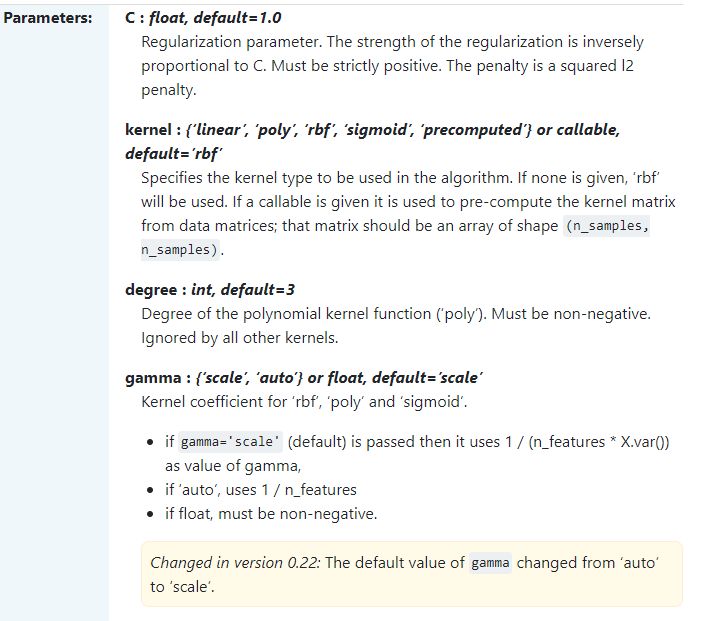
- 이걸 어떻게 사용하는거쥬? GridSearch에서 이용하,..?


In [23]:
# %pip install  lightgbm from lightgbm import LGBMClassifier ## decisionTree를 이용하는데 기능 증진된것을 사용. 

In [24]:
from sklearn.svm import SVC # 분류형 Support Vector Classification

In [25]:
model = SVC()

In [26]:
model.fit(features.toarray(), target) 
# 현재 이 파일에서 실행되는 작업은 numpy 형식이라 feature, target은 변환이 필요함. 
# 만약 pandas 안에서 이루어진것이면 그냥 feature만 하면됨. 

SVC()

### 머신러닝 통한 예측
comment = '코로나19의 여파로 전 세계 교사들과 학생들 모두 혼란스러운 시기를 보내고 있습니다.어려움 속에서도 학생들을 위해 안간힘을 쓰고 있는 모든 선생님들에게, 응원과 박수를 함께 보냅니다.'

In [27]:
comment = '코로나19의 여파로 전 세계 교사들과 학생들 모두 혼란스러운 시기를 보내고 있습니다.어려움 속에서도 학생들을 위해 안간힘을 쓰고 있는 모든 선생님들에게, 응원과 박수를 함께 보냅니다.'

In [28]:
# 일단 이거 쪼갠다
tokenized_comment =mecab.morphs(comment)

In [29]:
vectorized_comment = tfidfVectorizer.transform([' '.join(tokenized_comment)])

In [30]:
vectorized_comment.toarray() # vacabrary에 일치되는것만 변환되기때문

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.61500789,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.36365848,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.69965549, 0.        ,
        0.        , 0.        , 0.        , 0.  

In [31]:
model.predict(vectorized_comment.toarray()) #이렇게 되면 comment의 문장은 긍정에 가깝다는 예측이 됨. 

array(['긍정'], dtype='<U2')

In [32]:
len(features.toarray()), len(target)

(20, 20)